In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from map_countries import map_countries
%matplotlib inline

In [2]:
int_results = pd.read_csv('data/fifa/international_results.csv')
int_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
int_results['home_team'] = int_results['home_team'].copy().apply(map_countries)
int_results['away_team'] = int_results['away_team'].copy().apply(map_countries)
int_results['country'] = int_results['country'].copy().apply(map_countries)

In [4]:
int_results['home_win'] = (int_results.home_score - int_results.away_score > 0).astype(int)
int_results.loc[int_results['home_score'] == int_results['away_score'], 'home_win'] = 2

In [5]:
int_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win
0,1872-11-30,scotland,england,0,0,Friendly,Glasgow,scotland,False,2
1,1873-03-08,england,scotland,4,2,Friendly,London,england,False,1
2,1874-03-07,scotland,england,2,1,Friendly,Glasgow,scotland,False,1
3,1875-03-06,england,scotland,2,2,Friendly,London,england,False,2
4,1876-03-04,scotland,england,3,0,Friendly,Glasgow,scotland,False,1


In [6]:
winners = []
for i, winner in enumerate(int_results.home_win):
    if winner == 1:
        winners.append(int_results.loc[i, 'home_team'])
    elif winner == 0:
        winners.append(int_results.loc[i, 'away_team'])
    else:
        winners.append('Tie')
int_results['Winner'] = winners
int_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,Winner
0,1872-11-30,scotland,england,0,0,Friendly,Glasgow,scotland,False,2,Tie
1,1873-03-08,england,scotland,4,2,Friendly,London,england,False,1,england
2,1874-03-07,scotland,england,2,1,Friendly,Glasgow,scotland,False,1,scotland
3,1875-03-06,england,scotland,2,2,Friendly,London,england,False,2,Tie
4,1876-03-04,scotland,england,3,0,Friendly,Glasgow,scotland,False,1,scotland


In [7]:
earliest_date = '2010-01-01'
int_results_after = int_results[(int_results['date'] > '2014-01-01') & (int_results['date'] < '2018-06-14')].copy()
int_results_after['date'] = pd.to_datetime(int_results_after['date'])
int_results_after = int_results_after.reset_index(drop = True)
int_results_after.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,Winner
0,2014-01-04,bahrain,jordan,0,1,WAFF Championship,Doha,qatar,True,0,jordan
1,2014-01-04,namibia,ghana,0,1,Friendly,Windhoek,namibia,False,0,ghana
2,2014-01-04,nigeria,ethiopia,2,1,Friendly,Abuja,nigeria,False,1,nigeria
3,2014-01-04,qatar,kuwait,3,0,WAFF Championship,Doha,qatar,False,1,qatar
4,2014-01-07,bahrain,kuwait,0,0,WAFF Championship,Doha,qatar,True,2,Tie


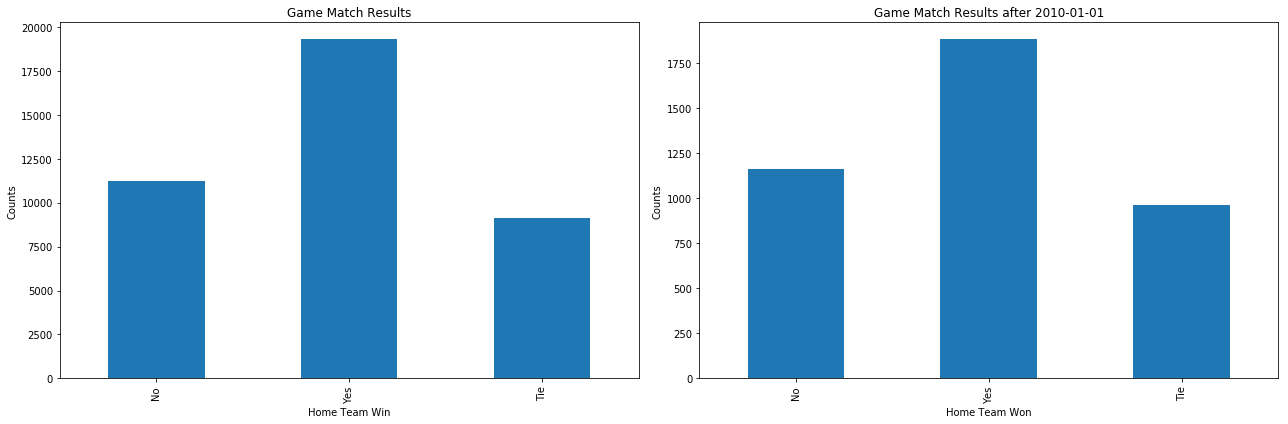

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 6))
int_results.groupby(['home_win']).count()['home_score'].plot(kind='bar', ax = ax1)
int_results_after.groupby(['home_win']).count()['home_score'].plot(kind='bar', ax = ax2)
plt.sca(ax1)
plt.ylabel('Counts')
locs, labels = plt.xticks()
plt.xticks(locs, ('No', 'Yes', 'Tie'))
plt.title('Game Match Results')
plt.xlabel('Home Team Win')
plt.sca(ax2)
plt.ylabel('Counts')
locs, labels = plt.xticks()
plt.xticks(locs, ('No', 'Yes', 'Tie'))
plt.title('Game Match Results after {}'.format(earliest_date))
plt.xlabel('Home Team Won');

plt.tight_layout()
plt.savefig('figs/gamematchresults.png');

In [9]:
win_count = int_results_after.groupby('Winner')['home_team'].count().reset_index()
win_count.columns = ['Team', 'Number of Wins']
win_count = win_count[win_count['Team'] != 'Tie']


In [10]:
worldcup_teams =['Egypt', 'Russia', 'Saudi Arabia', 'Uruguay', 'Iran', 'Morocco',
       'Portugal', 'Spain', 'Australia', 'Denmark', 'France', 'Peru',
       'Argentina', 'Croatia', 'Iceland', 'Nigeria', 'Brazil',
       'Costa Rica', 'Serbia', 'Switzerland', 'Germany', 'Mexico',
       'Korea Republic', 'Sweden', 'Belgium', 'England', 'Panama', 'Tunisia',
       'Colombia', 'Japan', 'Poland', 'Senegal']
worldcup_teams = [team_name.lower() for team_name in worldcup_teams]
worldcup_team_win_count = win_count[win_count['Team'].isin(worldcup_teams)]

In [11]:
games = []
for team in worldcup_team_win_count.Team:
    games.append(len(int_results_after[int_results_after['away_team'] == team].copy()) +\
                len(int_results_after[int_results_after['home_team'] == team].copy()))
worldcup_team_win_count['Number of Games'] = games
worldcup_team_win_count['Win Rate'] = worldcup_team_win_count['Number of Wins'].copy() /\
                            worldcup_team_win_count['Number of Games'].copy()
worldcup_team_win_count = worldcup_team_win_count.sort_values('Win Rate', ascending = False).copy()
worldcup_team_win_count

/Users/blin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/blin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Team,Number of Wins,Number of Games,Win Rate
23,belgium,37,52,0.711538
32,brazil,37,53,0.698113
77,france,39,58,0.672414
206,spain,33,50,0.660000
216,switzerland,29,46,0.630435
180,portugal,37,59,0.627119
82,germany,38,61,0.622951
104,iran,32,52,0.615385
68,england,31,51,0.607843
192,senegal,29,50,0.580000


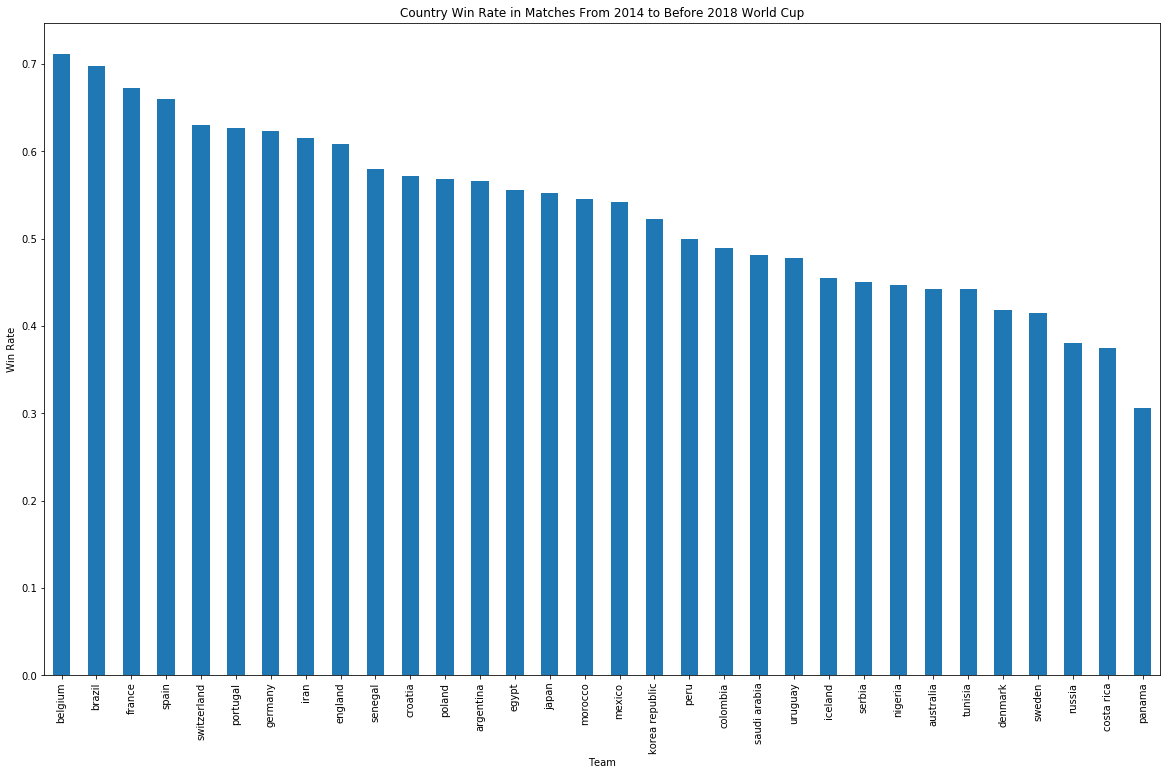

In [12]:
worldcup_team_win_count.plot.bar('Team', 'Win Rate', figsize = (20, 12))
plt.ylabel('Win Rate')
plt.title('Country Win Rate in Matches From 2014 to Before 2018 World Cup', )
plt.xticks(rotation=90)
plt.legend().set_visible(False)
plt.savefig('figs/winrate.png', bbox_inches='tight');

In [13]:
#https://gitlab.com/djh_or/2018-world-cup-stats/blob/master/world_cup_2018_stats.csv
world_cup_results = pd.read_csv("data/world_cup_2018_stats.csv")
world_cup_results.head()

,Game,Group,Team,Opponent,Home/Away,Score,WDL,Pens?,Goals For,Goals Against,...,Passes Completed,Distance Covered km,Balls recovered,Tackles,Blocks,Clearances,Yellow cards,Red Cards,Second Yellow Card leading to Red Card,Fouls Committed
0,1,A,Russia,Saudi Arabia,home,5-0,W,NaN,5,0,...,240,118,53,9,3,19,1,0,0,22
1,1,A,Saudi Arabia,Russia,away,5-0,L,NaN,0,5,...,442,105,48,16,3,31,1,0,0,10
2,2,A,Egypt,Uruguay,home,0-1,L,NaN,0,1,...,308,112,57,12,4,32,2,0,0,12
3,2,A,Uruguay,Egypt,away,0-1,W,NaN,1,0,...,508,111,54,8,2,22,0,0,0,6
4,3,B,Morocco,IR Iran,home,0-1,L,NaN,0,1,...,371,101,38,9,1,16,1,0,0,22


In [14]:
world_cup_results['Team'] = world_cup_results['Team'].copy().apply(map_countries)
world_cup_results['Opponent'] = world_cup_results['Opponent'].copy().apply(map_countries)

In [15]:
test = world_cup_results[world_cup_results.index % 2 == 0].reset_index(drop = True)
test = test[['Team', 'Opponent', 'WDL']]
test.loc[test['WDL'] == 'L', 'WDL'] = 0
test.loc[test['WDL'] == 'W', 'WDL'] = 1
test.loc[test['WDL'] == 'D', 'WDL'] = 2
test.columns = ['home_team', 'away_team', 'home_win']
test.head()

,home_team,away_team,home_win
0,russia,saudi arabia,1
1,egypt,uruguay,0
2,morocco,iran,0
3,portugal,spain,2
4,france,australia,1


In [16]:
#https://www.kaggle.com/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
rankings = pd.read_csv('data/fifa_ranking.csv')
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])
ranking_earliest_date = earliest_date
#get one year before earliest date 
ranking_earliest_date = str(int(ranking_earliest_date[:4]) - 1) + earliest_date[4:]
rankings_after = rankings[rankings['rank_date'] > pd.to_datetime(ranking_earliest_date)]

In [17]:
def get_latest_ranking_date(match_date, rankings_dates):
    return rankings_dates[match_date.to_datetime64() >  rankings_dates].max()

In [18]:
rankings_dates_after = rankings_after.rank_date.unique()
int_results_after['latest_ranking_date'] = int_results_after['date'].copy().apply(\
                                        get_latest_ranking_date, args = [rankings_dates_after])
test['latest_ranking_date'] = get_latest_ranking_date(pd.to_datetime('2018-6-14'), rankings_dates_after)

In [19]:
int_results_after.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,Winner,latest_ranking_date
0,2014-01-04,bahrain,jordan,0,1,WAFF Championship,Doha,qatar,True,0,jordan,2013-12-19
1,2014-01-04,namibia,ghana,0,1,Friendly,Windhoek,namibia,False,0,ghana,2013-12-19
2,2014-01-04,nigeria,ethiopia,2,1,Friendly,Abuja,nigeria,False,1,nigeria,2013-12-19
3,2014-01-04,qatar,kuwait,3,0,WAFF Championship,Doha,qatar,False,1,qatar,2013-12-19
4,2014-01-07,bahrain,kuwait,0,0,WAFF Championship,Doha,qatar,True,2,Tie,2013-12-19


In [20]:
rankings_after['country_mapped'] = rankings_after['country_full'].copy().apply(map_countries)

/Users/blin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
set(rankings_after.country_mapped) - set(int_results_after.home_team.unique())

{'bahamas',
 'brunei darussalam',
 'cayman islands',
 'netherlands antilles',
 'us virgin islands'}

In [22]:
set(int_results_after.home_team.unique()) - set(rankings_after.country_mapped) 

{'abkhazia',
 'alderney',
 'arameans suryoye',
 'artsakh',
 'barawa',
 'bonaire',
 'brunei',
 'cascadia',
 'chagos islands',
 'county of nice',
 'darfur',
 'ellan vannin',
 'falkland islands',
 'felvidék',
 'french guyana',
 'frøya',
 'gotland',
 'greenland',
 'guadeloupe',
 'guersney',
 'hitra',
 'iraqi kurdistan',
 'isle of man',
 'isle of wight',
 'jersey',
 'kabylia',
 'kárpátalja',
 'martinique',
 'matabeleland',
 'menorca',
 'northern cyprus',
 'northern mariana islands',
 'occitania',
 'orkney',
 'padania',
 'panjab',
 'raetia',
 'romani people',
 'saare county',
 'shetland',
 'sint maarten',
 'somaliland',
 'south ossetia',
 'székely land',
 'sápmi',
 'tamil eelam',
 'tibet',
 'tuvalu',
 'united koreans in japan',
 'virgin islands',
 'western armenia',
 'western isles',
 'ynys môn',
 'zanzibar',
 'åland islands'}

In [23]:
int_results_after.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'home_win', 'Winner',
       'latest_ranking_date'],
      dtype='object')

In [24]:
home_rankings_after = rankings_after.copy()
home_rankings_after.columns = ['home_' + column for column in home_rankings_after.columns]
results_df = int_results_after.merge(home_rankings_after, left_on = ['home_team', 'latest_ranking_date'],\
                            right_on = ['home_country_mapped', 'home_rank_date'])
away_rankings_after = rankings_after.copy()
away_rankings_after.columns = ['away_' + column for column in away_rankings_after.columns]
results_df = results_df.merge(away_rankings_after, left_on = ['away_team', 'latest_ranking_date'],\
                            right_on = ['away_country_mapped', 'away_rank_date'])
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_win,...,away_cur_year_avg_weighted,away_last_year_avg,away_last_year_avg_weighted,away_two_year_ago_avg,away_two_year_ago_weighted,away_three_year_ago_avg,away_three_year_ago_weighted,away_confederation,away_rank_date,away_country_mapped
0,2014-01-04,bahrain,jordan,0,1,WAFF Championship,Doha,qatar,True,0,...,343.17,152.19,76.10,266.37,79.91,182.25,36.45,AFC,2013-12-19,jordan
1,2014-01-07,qatar,jordan,2,0,WAFF Championship,Doha,qatar,False,1,...,343.17,152.19,76.10,266.37,79.91,182.25,36.45,AFC,2013-12-19,jordan
2,2014-01-07,bahrain,kuwait,0,0,WAFF Championship,Doha,qatar,True,2,...,172.78,95.79,47.90,187.73,56.32,189.73,37.95,AFC,2013-12-19,kuwait
3,2014-01-04,qatar,kuwait,3,0,WAFF Championship,Doha,qatar,False,1,...,172.78,95.79,47.90,187.73,56.32,189.73,37.95,AFC,2013-12-19,kuwait
4,2014-01-04,namibia,ghana,0,1,Friendly,Windhoek,namibia,False,0,...,453.96,398.69,199.35,288.00,86.40,544.92,108.98,CAF,2013-12-19,ghana


In [25]:
test = test.merge(home_rankings_after, left_on = ['home_team', 'latest_ranking_date'],\
                            right_on = ['home_country_mapped', 'home_rank_date'])
test = test.merge(away_rankings_after, left_on = ['away_team', 'latest_ranking_date'],\
                            right_on = ['away_country_mapped', 'away_rank_date'])
test.head()

,home_team,away_team,home_win,latest_ranking_date,home_rank,home_country_full,home_country_abrv,home_total_points,home_previous_points,home_rank_change,...,away_cur_year_avg_weighted,away_last_year_avg,away_last_year_avg_weighted,away_two_year_ago_avg,away_two_year_ago_weighted,away_three_year_ago_avg,away_three_year_ago_weighted,away_confederation,away_rank_date,away_country_mapped
0,russia,saudi arabia,1,2018-06-07,70,Russia,RUS,456.53,493,-4,...,143.89,360.20,180.10,380.91,114.27,135.09,27.02,AFC,2018-06-07,saudi arabia
1,uruguay,saudi arabia,1,2018-06-07,14,Uruguay,URU,1018.41,976,3,...,143.89,360.20,180.10,380.91,114.27,135.09,27.02,AFC,2018-06-07,saudi arabia
2,russia,egypt,1,2018-06-07,70,Russia,RUS,456.53,493,-4,...,208.27,582.07,291.04,331.62,99.48,253.18,50.64,CAF,2018-06-07,egypt
3,saudi arabia,egypt,1,2018-06-07,67,Saudi Arabia,KSA,465.28,462,0,...,208.27,582.07,291.04,331.62,99.48,253.18,50.64,CAF,2018-06-07,egypt
4,russia,croatia,0,2018-06-07,70,Russia,RUS,456.53,493,-4,...,397.75,672.78,336.39,335.96,100.79,551.26,110.25,UEFA,2018-06-07,croatia


In [26]:
demographics = pd.read_csv('data/demographics.csv')
demographics['name'] = demographics['name'].copy().apply(map_countries)

In [27]:
home_demographics = demographics.copy()
home_demographics.columns = ['home_' + column for column in home_demographics.columns]
results_df = results_df.merge(home_demographics, left_on = ['home_team'],
                            right_on = ['home_name'])

away_demographics = demographics.copy()
away_demographics.columns = ['away_' + column for column in away_demographics.columns]
results_df = results_df.merge(away_demographics, left_on = ['away_team'],
                            right_on = ['away_name'])

len(results_df)

3399

In [28]:
test = test.merge(home_demographics, left_on = ['home_team'], right_on = ['home_name'])
test = test.merge(away_demographics, left_on = ['away_team'], right_on = ['away_name'])
test.head()

,home_team,away_team,home_win,latest_ranking_date,home_rank,home_country_full,home_country_abrv,home_total_points,home_previous_points,home_rank_change,...,away_rank_date,away_country_mapped,home_name,home_temp,home_gdp_pp,home_population,away_name,away_temp,away_gdp_pp,away_population
0,russia,saudi arabia,1,2018-06-07,70,Russia,RUS,456.53,493,-4,...,2018-06-07,saudi arabia,russia,-5.10,27890.0,143989754.0,saudi arabia,24.65,55263.0,32938213.0
1,uruguay,saudi arabia,1,2018-06-07,14,Uruguay,URU,1018.41,976,3,...,2018-06-07,saudi arabia,uruguay,17.55,22445.0,3456750.0,saudi arabia,24.65,55263.0,32938213.0
2,russia,egypt,1,2018-06-07,70,Russia,RUS,456.53,493,-4,...,2018-06-07,egypt,russia,-5.10,27890.0,143989754.0,egypt,22.10,12994.0,97553151.0
3,saudi arabia,egypt,1,2018-06-07,67,Saudi Arabia,KSA,465.28,462,0,...,2018-06-07,egypt,saudi arabia,24.65,55263.0,32938213.0,egypt,22.10,12994.0,97553151.0
4,russia,croatia,0,2018-06-07,70,Russia,RUS,456.53,493,-4,...,2018-06-07,croatia,russia,-5.10,27890.0,143989754.0,croatia,10.90,24095.0,4189353.0


In [29]:
results_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'home_win', 'Winner',
       'latest_ranking_date', 'home_rank', 'home_country_full',
       'home_country_abrv', 'home_total_points', 'home_previous_points',
       'home_rank_change', 'home_cur_year_avg', 'home_cur_year_avg_weighted',
       'home_last_year_avg', 'home_last_year_avg_weighted',
       'home_two_year_ago_avg', 'home_two_year_ago_weighted',
       'home_three_year_ago_avg', 'home_three_year_ago_weighted',
       'home_confederation', 'home_rank_date', 'home_country_mapped',
       'away_rank', 'away_country_full', 'away_country_abrv',
       'away_total_points', 'away_previous_points', 'away_rank_change',
       'away_cur_year_avg', 'away_cur_year_avg_weighted', 'away_last_year_avg',
       'away_last_year_avg_weighted', 'away_two_year_ago_avg',
       'away_two_year_ago_weighted', 'away_three_year_ago_avg',
       'away_three_year_ago_weighted', 'away

In [306]:
columns = ['home_win', 'home_rank', 'away_rank',\
            'home_cur_year_avg_weighted', 'home_total_points','away_cur_year_avg_weighted',
            'away_total_points', 'home_last_year_avg', 'away_last_year_avg', 'home_two_year_ago_avg',
            'away_two_year_ago_avg', 'home_confederation', 'home_gdp_pp', 'away_gdp_pp']

# columns += ['home_population', 'away_population']
final_results_df = results_df[columns]
final_test_df = test[columns]

In [307]:

dataset = pd.concat(objs=[final_results_df.copy(), final_test_df.copy()], axis=0)
dataset['home_win'] = dataset['home_win'].astype('int')
tournament_dummies = pd.get_dummies(dataset['home_confederation'], drop_first = True)
dataset[tournament_dummies.columns] = tournament_dummies
dataset = dataset.drop(['home_confederation'], axis = 1)

dataset['home_gdp_pp'] = dataset[['home_gdp_pp']].fillna(dataset['home_gdp_pp'].min())
dataset['away_gdp_pp'] = dataset[['away_gdp_pp']].fillna(dataset['away_gdp_pp'].min())
dataset['gdp_pp_diff'] = dataset['home_gdp_pp'] - dataset['away_gdp_pp']
dataset = dataset.drop(['home_gdp_pp', 'away_gdp_pp'], axis = 1)
dataset['rank_diff'] = dataset['home_rank'] - dataset['away_rank']
dataset = dataset.drop(['home_rank', 'away_rank'], axis = 1)
# dataset['pop_diff'] = dataset['home_population'] - dataset['away_population']
# dataset = dataset.drop(['home_population', 'away_population'], axis = 1)


train_df = dataset[:len(final_results_df)]
test_df = dataset[len(final_results_df):]


In [308]:
train_df.head()

,home_win,home_cur_year_avg_weighted,home_total_points,away_cur_year_avg_weighted,away_total_points,home_last_year_avg,away_last_year_avg,home_two_year_ago_avg,away_two_year_ago_avg,CAF,CONCACAF,CONMEBOL,OFC,UEFA,gdp_pp_diff,rank_diff
0,0,174.70,291.66,343.17,535.63,102.82,152.19,163.78,266.37,0,0,0,0,0,39359.0,45
1,1,101.66,249.49,122.76,393.28,166.27,343.17,106.47,152.19,0,0,0,0,0,39359.0,41
2,2,151.41,289.46,257.72,436.97,131.81,102.61,151.92,242.16,0,0,0,0,0,39359.0,47
3,2,111.05,256.68,90.43,298.50,151.41,257.72,131.81,102.61,0,0,0,0,0,39359.0,16
4,1,140.16,324.85,343.17,535.63,183.57,152.19,225.79,266.37,0,0,0,0,0,112440.0,38


In [309]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [310]:
np.random.seed(2018)
train, validation = train_test_split(train_df, test_size = 0.2)
y_train = train['home_win'].as_matrix()
X_train = train.drop(['home_win'], axis = 1).as_matrix()
y_validation = validation['home_win'].as_matrix()
X_validation = validation.drop(['home_win'], axis = 1).as_matrix()


In [311]:
lr_model = LogisticRegressionCV(solver = 'lbfgs', max_iter = 5000, cv = 5, multi_class='multinomial').fit(X_train, y_train)

In [312]:
print(lr_model.score(X_train, y_train))
print(lr_model.score(X_validation, y_validation))

0.5509378447958808
0.5397058823529411


In [313]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [314]:
print(lda_model.score(X_train, y_train))
print(lda_model.score(X_validation, y_validation))

0.5553512320706142
0.5691176470588235


In [315]:
qda_model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

In [316]:
print(qda_model.score(X_train, y_train))
print(qda_model.score(X_validation, y_validation))

0.5479955866127253
0.5323529411764706


In [317]:
rf_model = RandomForestClassifier(min_samples_leaf = 20, n_estimators=100).fit(X_train, y_train)

In [318]:
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_validation, y_validation))

0.6237587348289813
0.5617647058823529


In [319]:
len(y_train)

2719

In [320]:
from sklearn.metrics import accuracy_score

print(accuracy_score(np.ones(len(y_train)), y_train))
print(accuracy_score(np.ones(len(y_validation)), y_validation))

0.48032364840014713
0.4441176470588235


In [321]:
y_test = test_df['home_win'].as_matrix()
X_test = test_df.drop(['home_win'], axis = 1).as_matrix()

In [322]:
lr_model.score(X_test, y_test)

0.546875

In [323]:
lda_model.score(X_test, y_test)

0.515625

In [324]:
qda_model.score(X_test, y_test)

0.46875

In [325]:
rf_model.score(X_test, y_test)

0.53125

In [326]:
print(accuracy_score(np.ones(len(y_test)), y_test))

0.421875


In [327]:
lr_model.predict_proba(X_test)

array([[0.25355193, 0.45215062, 0.29429745],
       [0.07119982, 0.72963911, 0.19916106],
       [0.30757492, 0.39620079, 0.29622428],
       [0.35283162, 0.35488302, 0.29228536],
       [0.48714357, 0.25172392, 0.26113252],
       [0.15969037, 0.56518458, 0.27512505],
       [0.11081363, 0.71973239, 0.16945398],
       [0.23892546, 0.4592674 , 0.30180713],
       [0.09053091, 0.71228425, 0.19718484],
       [0.09652212, 0.70862477, 0.19485311],
       [0.25962641, 0.49896323, 0.24141036],
       [0.43713898, 0.29123362, 0.27162739],
       [0.24649771, 0.49713202, 0.25637027],
       [0.25673863, 0.41856845, 0.32469291],
       [0.11213944, 0.63994777, 0.24791279],
       [0.14521716, 0.56206867, 0.29271418],
       [0.11197527, 0.63698316, 0.25104157],
       [0.2610247 , 0.44427958, 0.29469572],
       [0.29875918, 0.38407384, 0.31716698],
       [0.58684356, 0.14093393, 0.27222252],
       [0.3213153 , 0.40188959, 0.27679511],
       [0.27162326, 0.47216177, 0.25621497],
       [0.

In [328]:
y_test

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 1, 0,
       0, 2, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0])